In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from itertools import product

from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
class PolynomialRegression:
    
    def __init__(self, degree = 2):
        self.degree = degree
        
    def _make_poly_features(self, X):
            transformed_X = []
            for i in X:
                for j in range(self.degree+1):
                    transformed_X.append(pow(i,j))
            transformed_X = np.array(transformed_X)
            transformed_X = transformed_X.reshape(len(X),self.degree+1)
            return transformed_X
        
    def _error(self, y, y_pred):
        diff = y-y_pred
        reg = 0.
        if (self.reg == "L1"):
            reg = np.sum(np.abs(self.weights))*self.lambda_
        if (self.reg == "L2"):
            reg = np.sum(self.weights**2)*self.lambda_
        return np.sum(diff**2)/(2*len(y))+reg
    
    def transform_fit(self, x, y, learning_rate = 0.1, regularization = "None", epochs = 1000, _lambda = 1):
        
        x = self._make_poly_features(x)
        
        self.reg = regularization
        
        self.bias = 0
        
        self.lambda_ = _lambda
        
        self.weights = np.zeros(self.degree+1)
        
        self.learning_rate = learning_rate

        losses =[]

        n = x.shape[0]
        for epoch in range(epochs):
            y_hat = np.dot(x, self.weights)+self.bias
            diff = y-y_hat
            if (self.reg == "L1"):
                sign = np.where(self.weights > 0, 1, -1)
                gradient = np.dot(x.T, diff) * \
                    self.learning_rate/n + sign*self.lambda_/n
            elif (self.reg == "L2"):
                gradient = np.dot(x.T, diff)*self.learning_rate / \
                    n + self.lambda_*2*self.weights/n
            else:
                gradient = np.dot(x.T, diff)*self.learning_rate/n
            self.weights += gradient
            grad_b = np.sum(diff)*self.learning_rate/n
            self.bias += grad_b
            losses.append(self._error(y, y_hat))
            if(epoch%10 == 0):
                print(f"epoch : {epoch+1}, loss: ", self._error(y, y_hat))
            
        self.losses = losses
        
    def predict(self, x):
        
        x = self._make_poly_features(x)
        
        return np.dot(x, self.weights)+self.bias
    
    def loss_plot(self):
        x = list(range(1,len(self.losses)+1))
        y = self.losses
        plt.plot(x, y)
        plt.show()

In [58]:
def standardize(column):
    return (column - column.mean()) / column.std()

def apply(X):
    cols=list(X)
    for i in cols:
        X[i]=standardize(X[i])

In [406]:
def power(X,exponent):
    for i in range(len(X)):
        X[i] = X[i]**exponent
    return X
X = []
for i in range(0,100):
    X.append(i)
y = []
X = np.array(X)
print(X.shape)
y = -5*X+(2*power(X,2))
X = X/1000
y =y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# df.head()

(100,)


In [407]:
pr = PolynomialRegression(degree = 2)

### No regularisation

In [409]:
pr.transform_fit(X_train, y_train, learning_rate= 0.001, regularization="None", epochs=15000, _lambda= 0.01)

epoch : 1, loss:  39225596.2875
epoch : 11, loss:  2290518.6544565074
epoch : 21, loss:  2202371.265790722
epoch : 31, loss:  2118009.9108738997
epoch : 41, loss:  2037268.4508223615
epoch : 51, loss:  1959988.065566857
epoch : 61, loss:  1886016.9311996035
epoch : 71, loss:  1815209.9115669169
epoch : 81, loss:  1747428.2634589062
epoch : 91, loss:  1682539.3547967274
epoch : 101, loss:  1620416.3952443718
epoch : 111, loss:  1560938.1786971823
epoch : 121, loss:  1503988.837123483
epoch : 131, loss:  1449457.605258766
epoch : 141, loss:  1397238.5956739571
epoch : 151, loss:  1347230.5837603852
epoch : 161, loss:  1299336.8021942384
epoch : 171, loss:  1253464.7444625578
epoch : 181, loss:  1209525.9770512655
epoch : 191, loss:  1167435.9599133276
epoch : 201, loss:  1127113.8748519795
epoch : 211, loss:  1088482.4614700663
epoch : 221, loss:  1051467.860351899
epoch : 231, loss:  1015999.4631587614
epoch : 241, loss:  982009.7693332586
epoch : 251, loss:  949434.2491211217
epoch : 2

epoch : 5461, loss:  5100.608493408943
epoch : 5471, loss:  5062.2258711382565
epoch : 5481, loss:  5024.143313250528
epoch : 5491, loss:  4986.358473925764
epoch : 5501, loss:  4948.869025682927
epoch : 5511, loss:  4911.672659236656
epoch : 5521, loss:  4874.767083355218
epoch : 5531, loss:  4838.150024718938
epoch : 5541, loss:  4801.819227780739
epoch : 5551, loss:  4765.772454626404
epoch : 5561, loss:  4730.007484837629
epoch : 5571, loss:  4694.522115354643
epoch : 5581, loss:  4659.3141603404
epoch : 5591, loss:  4624.381451046711
epoch : 5601, loss:  4589.721835679503
epoch : 5611, loss:  4555.333179267583
epoch : 5621, loss:  4521.213363529701
epoch : 5631, loss:  4487.360286745211
epoch : 5641, loss:  4453.771863624249
epoch : 5651, loss:  4420.446025179009
epoch : 5661, loss:  4387.380718596522
epoch : 5671, loss:  4354.573907112322
epoch : 5681, loss:  4322.0235698845745
epoch : 5691, loss:  4289.727701870094
epoch : 5701, loss:  4257.68431370058
epoch : 5711, loss:  4225.

epoch : 10861, loss:  261.77669387220647
epoch : 10871, loss:  261.2226703555381
epoch : 10881, loss:  260.6729780355696
epoch : 10891, loss:  260.1275830523171
epoch : 10901, loss:  259.58645181037974
epoch : 10911, loss:  259.0495509770731
epoch : 10921, loss:  258.5168474802887
epoch : 10931, loss:  257.9883085064416
epoch : 10941, loss:  257.4639014984824
epoch : 10951, loss:  256.94359415390346
epoch : 10961, loss:  256.4273544227144
epoch : 10971, loss:  255.91515050548446
epoch : 10981, loss:  255.4069508513716
epoch : 10991, loss:  254.9027241561808
epoch : 11001, loss:  254.40243936047773
epoch : 11011, loss:  253.90606564763607
epoch : 11021, loss:  253.41357244189695
epoch : 11031, loss:  252.9249294066132
epoch : 11041, loss:  252.44010644221962
epoch : 11051, loss:  251.95907368452353
epoch : 11061, loss:  251.48180150276835
epoch : 11071, loss:  251.00826049787293
epoch : 11081, loss:  250.53842150051713
epoch : 11091, loss:  250.0722555695128
epoch : 11101, loss:  249.60

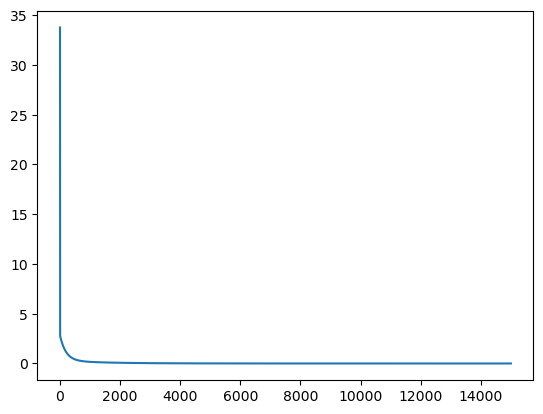

In [374]:
pr.loss_plot()

[13.67740952  3.17784845 14.35028031 15.39130818  4.38154651 12.69964209
  8.11502238  9.71093776  2.16619855 16.10658441  0.87489339  1.7910724
 -0.05073083  5.56738043  2.43573018 18.74520824  7.37191559  0.04116305
  0.32271658 15.04005688]
[ 1.3692e+01  3.1570e+00  1.4362e+01  1.5397e+01  4.3680e+00  1.2717e+01
  8.1250e+00  9.7270e+00  2.1420e+00  1.6107e+01  8.5800e-01  1.7670e+00
 -3.0000e-03  5.5620e+00  2.4120e+00  1.8718e+01  7.3780e+00  6.3000e-02
  3.2200e-01  1.5048e+01]


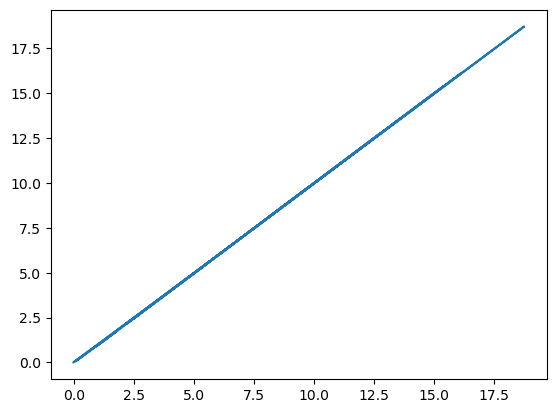

In [375]:
y_pred = pr.predict(X_test)
plt.plot(y_pred,y_test)
print(y_pred)
print(y_test)

### L1

In [376]:
pr.transform_fit(X_train, y_train, learning_rate= 0.001, regularization="L1", epochs=15000, _lambda= 0.001)


epoch : 1, loss:  33.758435499477535
epoch : 11, loss:  2.677325274538599
epoch : 21, loss:  2.5570693745126514
epoch : 31, loss:  2.442698418846099
epoch : 41, loss:  2.3339206281870872
epoch : 51, loss:  2.230458713426462
epoch : 61, loss:  2.1320491560453614
epoch : 71, loss:  2.0384415242009806
epoch : 81, loss:  1.9493978227758824
epoch : 91, loss:  1.864691875704263
epoch : 101, loss:  1.7841087389724353
epoch : 111, loss:  1.707444142770281
epoch : 121, loss:  1.6345039613461274
epoch : 131, loss:  1.5651037091893447
epoch : 141, loss:  1.4990680622332917
epoch : 151, loss:  1.4362304028361506
epoch : 161, loss:  1.3764323873588822
epoch : 171, loss:  1.319523535218179
epoch : 181, loss:  1.265360838347993
epoch : 191, loss:  1.2138083900561905
epoch : 201, loss:  1.1647370323131965
epoch : 211, loss:  1.1180240205573242
epoch : 221, loss:  1.073552705146926
epoch : 231, loss:  1.0312122286327148
epoch : 241, loss:  0.9908972380646291
epoch : 251, loss:  0.9525076115866553
epoch

epoch : 4271, loss:  0.014348814263754905
epoch : 4281, loss:  0.014256053862714963
epoch : 4291, loss:  0.01416399556934664
epoch : 4301, loss:  0.014072634086646163
epoch : 4311, loss:  0.01398196415745945
epoch : 4321, loss:  0.01389198056418401
epoch : 4331, loss:  0.013802678128473175
epoch : 4341, loss:  0.013714051710942648
epoch : 4351, loss:  0.013626096210879216
epoch : 4361, loss:  0.013538806565951297
epoch : 4371, loss:  0.013452177751922045
epoch : 4381, loss:  0.01336620478236415
epoch : 4391, loss:  0.013280882708377267
epoch : 4401, loss:  0.013196206618306644
epoch : 4411, loss:  0.013112171637464934
epoch : 4421, loss:  0.013028772927855167
epoch : 4431, loss:  0.012946005687896313
epoch : 4441, loss:  0.012863865152150385
epoch : 4451, loss:  0.01278234659105194
epoch : 4461, loss:  0.012701445310639471
epoch : 4471, loss:  0.012621156652288816
epoch : 4481, loss:  0.012541475992448276
epoch : 4491, loss:  0.012462398742376259
epoch : 4501, loss:  0.0123839203478798

epoch : 7901, loss:  0.0028985737351823948
epoch : 7911, loss:  0.002892818279186057
epoch : 7921, loss:  0.002887107380248798
epoch : 7931, loss:  0.002881440699913017
epoch : 7941, loss:  0.0028758179022817356
epoch : 7951, loss:  0.0028702386539991957
epoch : 7961, loss:  0.0028647026242317572
epoch : 7971, loss:  0.0028592094846487275
epoch : 7981, loss:  0.002853758909403606
epoch : 7991, loss:  0.0028483505751152917
epoch : 8001, loss:  0.002842984160849341
epoch : 8011, loss:  0.002837659348099709
epoch : 8021, loss:  0.002832375820770231
epoch : 8031, loss:  0.002827133265156506
epoch : 8041, loss:  0.0028219313699278338
epoch : 8051, loss:  0.00281676982610927
epoch : 8061, loss:  0.0028116483270639054
epoch : 8071, loss:  0.0028065665684750365
epoch : 8081, loss:  0.0028015242483289183
epoch : 8091, loss:  0.00279652106689707
epoch : 8101, loss:  0.0027915567267192878
epoch : 8111, loss:  0.00278663093258637
epoch : 8121, loss:  0.002781743391523094
epoch : 8131, loss:  0.002

epoch : 11351, loss:  0.002218213675021091
epoch : 11361, loss:  0.00221788583572273
epoch : 11371, loss:  0.0022175611322032105
epoch : 11381, loss:  0.002217239540099413
epoch : 11391, loss:  0.0022169210352346183
epoch : 11401, loss:  0.002216605593616995
epoch : 11411, loss:  0.0022162931914382735
epoch : 11421, loss:  0.002215983805072327
epoch : 11431, loss:  0.0022156774110737854
epoch : 11441, loss:  0.0022153739861766612
epoch : 11451, loss:  0.0022150735072930137
epoch : 11461, loss:  0.002214775951511531
epoch : 11471, loss:  0.002214481296096271
epoch : 11481, loss:  0.002214189518485301
epoch : 11491, loss:  0.002213900596289323
epoch : 11501, loss:  0.0022136145072904406
epoch : 11511, loss:  0.002213331229440835
epoch : 11521, loss:  0.002213050740861421
epoch : 11531, loss:  0.002212773019840644
epoch : 11541, loss:  0.0022124980448331405
epoch : 11551, loss:  0.0022122257944585458
epoch : 11561, loss:  0.0022119562475001703
epoch : 11571, loss:  0.002211689382903788
ep

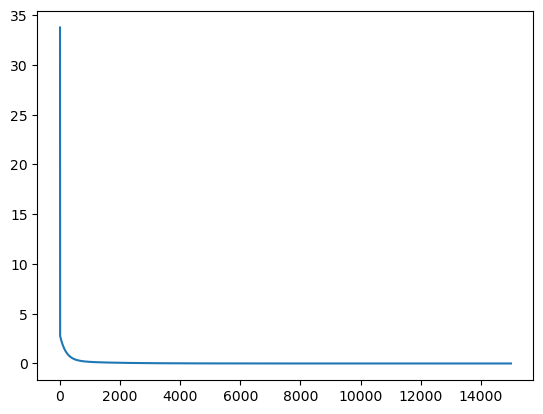

In [377]:
pr.loss_plot()

[13.68116763  3.18760098 14.3522439  15.39017005  4.39276064 12.70571174
  8.12718364  9.72187456  2.1742804  16.10308732  0.88025087  1.79843145
 -0.04773784  5.57947981  2.44429681 18.73142016  7.38431638  0.04440623
  0.32670508 15.04000935]
[ 1.3692e+01  3.1570e+00  1.4362e+01  1.5397e+01  4.3680e+00  1.2717e+01
  8.1250e+00  9.7270e+00  2.1420e+00  1.6107e+01  8.5800e-01  1.7670e+00
 -3.0000e-03  5.5620e+00  2.4120e+00  1.8718e+01  7.3780e+00  6.3000e-02
  3.2200e-01  1.5048e+01]


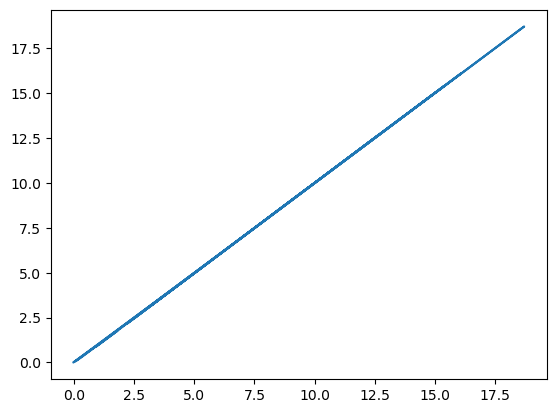

In [378]:
y_pred = pr.predict(X_test)
plt.plot(y_pred,y_test)
print(y_pred)
print(y_test)

### L2

In [379]:
pr.transform_fit(X_train, y_train, learning_rate= 0.001, regularization="L2", epochs=15000, _lambda= 0.00001)

epoch : 1, loss:  33.75815191103519
epoch : 11, loss:  2.6773753360588533
epoch : 21, loss:  2.557523374035795
epoch : 31, loss:  2.443523734214977
epoch : 41, loss:  2.335086584868851
epoch : 51, loss:  2.2319364790011247
epoch : 61, loss:  2.1338116401817135
epoch : 71, loss:  2.040463283839846
epoch : 81, loss:  1.9516549722548204
epoch : 91, loss:  1.8671620015713022
epoch : 101, loss:  1.7867708192491785
epoch : 111, loss:  1.7102784704368532
epoch : 121, loss:  1.6374920718319455
epoch : 131, loss:  1.5682283116646498
epoch : 141, loss:  1.5023129745067427
epoch : 151, loss:  1.4395804896736508
epoch : 161, loss:  1.3798735020482016
epoch : 171, loss:  1.3230424642127736
epoch : 181, loss:  1.2689452488319277
epoch : 191, loss:  1.2174467802800535
epoch : 201, loss:  1.168418684558524
epoch : 211, loss:  1.1217389565942786
epoch : 221, loss:  1.0772916440568545
epoch : 231, loss:  1.0349665468737081
epoch : 241, loss:  0.9946589316644219
epoch : 251, loss:  0.9562692603530617
epo

epoch : 3701, loss:  0.01920324607818418
epoch : 3711, loss:  0.019059730383441626
epoch : 3721, loss:  0.018917297180257336
epoch : 3731, loss:  0.018775938308457776
epoch : 3741, loss:  0.018635645669425417
epoch : 3751, loss:  0.01849641122563117
epoch : 3761, loss:  0.01835822700017019
epoch : 3771, loss:  0.018221085076301786
epoch : 3781, loss:  0.018084977596992974
epoch : 3791, loss:  0.017949896764465335
epoch : 3801, loss:  0.01781583483974587
epoch : 3811, loss:  0.017682784142221013
epoch : 3821, loss:  0.017550737049194295
epoch : 3831, loss:  0.01741968599544733
epoch : 3841, loss:  0.01728962347280494
epoch : 3851, loss:  0.017160542029702373
epoch : 3861, loss:  0.017032434270757273
epoch : 3871, loss:  0.016905292856344224
epoch : 3881, loss:  0.01677911050217237
epoch : 3891, loss:  0.016653879978867286
epoch : 3901, loss:  0.01652959411155536
epoch : 3911, loss:  0.01640624577945116
epoch : 3921, loss:  0.016283827915448933
epoch : 3931, loss:  0.016162333505716466
e

epoch : 7731, loss:  0.0010871243093201564
epoch : 7741, loss:  0.0010803759162570426
epoch : 7751, loss:  0.0010736786880048083
epoch : 7761, loss:  0.0010670322379287168
epoch : 7771, loss:  0.001060436182310809
epoch : 7781, loss:  0.0010538901403281317
epoch : 7791, loss:  0.001047393734030609
epoch : 7801, loss:  0.0010409465883196745
epoch : 7811, loss:  0.001034548330926574
epoch : 7821, loss:  0.0010281985923911207
epoch : 7831, loss:  0.0010218970060405302
epoch : 7841, loss:  0.0010156432079683605
epoch : 7851, loss:  0.0010094368370137156
epoch : 7861, loss:  0.0010032775347405035
epoch : 7871, loss:  0.0009971649454169978
epoch : 7881, loss:  0.0009910987159952047
epoch : 7891, loss:  0.0009850784960909252
epoch : 7901, loss:  0.0009791039379635062
epoch : 7911, loss:  0.0009731746964959784
epoch : 7921, loss:  0.0009672904291752445
epoch : 7931, loss:  0.0009614507960724076
epoch : 7941, loss:  0.0009556554598233411
epoch : 7951, loss:  0.000949904085609428
epoch : 7961, l

epoch : 11651, loss:  0.0002444790819393007
epoch : 11661, loss:  0.0002441464198164956
epoch : 11671, loss:  0.0002438163399137914
epoch : 11681, loss:  0.00024348882249314218
epoch : 11691, loss:  0.00024316384796628743
epoch : 11701, loss:  0.00024284139689358678
epoch : 11711, loss:  0.00024252144998291025
epoch : 11721, loss:  0.00024220398808848394
epoch : 11731, loss:  0.00024188899220983664
epoch : 11741, loss:  0.0002415764434906556
epoch : 11751, loss:  0.00024126632321773398
epoch : 11761, loss:  0.00024095861281986662
epoch : 11771, loss:  0.00024065329386676855
epoch : 11781, loss:  0.0002403503480680188
epoch : 11791, loss:  0.00024004975727204698
epoch : 11801, loss:  0.0002397515034650015
epoch : 11811, loss:  0.00023945556876977606
epoch : 11821, loss:  0.00023916193544491516
epoch : 11831, loss:  0.00023887058588366558
epoch : 11841, loss:  0.00023858150261288932
epoch : 11851, loss:  0.00023829466829210463
epoch : 11861, loss:  0.0002380100657124258
epoch : 11871, lo

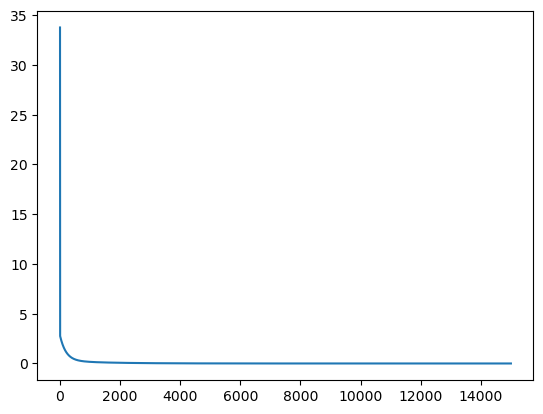

In [380]:
pr.loss_plot()

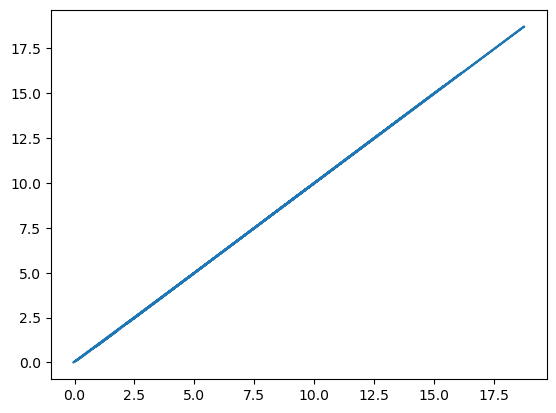

In [381]:
y_pred = pr.predict(X_test)
plt.plot(y_pred,y_test)